## Dependencias

In [1]:
!pip install giotto-tda

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 7.9 MB/s 
     |████████████████████████████████| 458 kB 18.7 MB/s 
     |████████████████████████████████| 3.1 MB 32.0 MB/s 
     |████████████████████████████████| 529 kB 38.7 MB/s 
     |████████████████████████████████| 1.6 MB 64.6 MB/s 


In [2]:
!pip install gudhi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 28.7 MB 1.3 MB/s 


In [5]:
import pandas as pd
import numpy as np
import numpy as np
import gudhi as gd  
from sklearn import manifold
from pylab import *
from sklearn.decomposition import PCA
from gtda.plotting import plot_point_cloud
from gtda.time_series import SingleTakensEmbedding

%matplotlib inline
# import sklearn_tda


### Importar datos

In [6]:
object=pd.read_pickle('uke_eggedal_data_challenge.pkl')
df=pd.DataFrame.from_dict(object,orient='index')

In [7]:
df=df.T
df

,flow,obs_tas,flow_dates,obs_lon_lat,obs_pr,obs_dates
0,1.723781,"[-10.600000381469727, -9.699999809265137, -6.6...",1958-01-04,9.37,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.10000000...",1957-01-01
1,0.960882,"[-20.5, -19.100000381469727, -12.0, -17.700000...",1958-01-05,60.23,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.20000000...",1957-01-02
2,0.001,"[-23.600000381469727, -22.5, -15.1000003814697...",1958-01-06,None,"[0.10000000149011612, 0.0, 0.30000001192092896...",1957-01-03
3,0.001,"[-16.200000762939453, -16.0, -14.1000003814697...",1958-01-07,None,"[1.0, 0.0, 1.0, 1.100000023841858, 0.899999976...",1957-01-04
4,0.316796,"[-7.900000095367432, -7.800000190734863, -9.5,...",1958-01-08,None,"[9.300000190734863, 8.600000381469727, 8.0, 8....",1957-01-05
...,...,...,...,...,...,...
21541,1.812796,"[-12.5, -11.699999809265137, -8.60000038146972...",2016-12-26,None,"[2.200000047683716, 0.10000000149011612, 1.100...",2015-12-27
21542,None,"[-12.5, -11.899999618530273, -9.10000038146972...",NaT,None,"[5.5, 4.900000095367432, 8.300000190734863, 6....",2015-12-28
21543,None,"[-11.899999618530273, -11.399999618530273, -8....",NaT,None,"[1.7999999523162842, 1.7000000476837158, 2.099...",2015-12-29
21544,None,"[-7.0, -6.5, -3.4000000953674316, -5.900000095...",NaT,None,"[4.099999904632568, 3.5, 4.599999904632568, 5....",2015-12-30


### Hay un desface en la data, se separan en df_target y df predic, se usa merge con date como llave

In [8]:
df_target=df[['flow_dates','flow']]
df_target.sort_values(by='flow_dates')
df_target=df_target.dropna()
df_target

,flow_dates,flow
0,1958-01-04,1.723781
1,1958-01-05,0.960882
2,1958-01-06,0.001
3,1958-01-07,0.001
4,1958-01-08,0.316796
...,...,...
21537,2016-12-22,4.84329
21538,2016-12-23,3.75697
21539,2016-12-24,3.556818
21540,2016-12-25,3.402133


In [9]:
df_predic=df[['obs_dates','obs_tas','obs_pr']]
df_predic.sort_values(by='obs_dates')
df_predic=df_predic.dropna()
df_predic


,obs_dates,obs_tas,obs_pr
0,1957-01-01,"[-10.600000381469727, -9.699999809265137, -6.6...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.10000000..."
1,1957-01-02,"[-20.5, -19.100000381469727, -12.0, -17.700000...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.20000000..."
2,1957-01-03,"[-23.600000381469727, -22.5, -15.1000003814697...","[0.10000000149011612, 0.0, 0.30000001192092896..."
3,1957-01-04,"[-16.200000762939453, -16.0, -14.1000003814697...","[1.0, 0.0, 1.0, 1.100000023841858, 0.899999976..."
4,1957-01-05,"[-7.900000095367432, -7.800000190734863, -9.5,...","[9.300000190734863, 8.600000381469727, 8.0, 8...."
...,...,...,...
21541,2015-12-27,"[-12.5, -11.699999809265137, -8.60000038146972...","[2.200000047683716, 0.10000000149011612, 1.100..."
21542,2015-12-28,"[-12.5, -11.899999618530273, -9.10000038146972...","[5.5, 4.900000095367432, 8.300000190734863, 6...."
21543,2015-12-29,"[-11.899999618530273, -11.399999618530273, -8....","[1.7999999523162842, 1.7000000476837158, 2.099..."
21544,2015-12-30,"[-7.0, -6.5, -3.4000000953674316, -5.900000095...","[4.099999904632568, 3.5, 4.599999904632568, 5...."


### Se hace el merge tomando como llaves las fechas, el resultado es un df con fechas que ya hacen match

In [10]:
df_final=df_predic.merge(df_target,how='inner',left_on='obs_dates',right_on='flow_dates')
df_final

,obs_dates,obs_tas,obs_pr,flow_dates,flow
0,1958-01-04,"[-12.800000190734863, -13.0, -13.0, -12.5, -12...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",1958-01-04,1.723781
1,1958-01-05,"[-7.800000190734863, -7.900000095367432, -8.39...","[2.0, 2.200000047683716, 3.0, 3.29999995231628...",1958-01-05,0.960882
2,1958-01-06,"[-11.0, -9.899999618530273, -6.5, -8.5, -9.0, ...","[12.699999809265137, 11.0, 16.5, 12.5, 11.1999...",1958-01-06,0.001
3,1958-01-07,"[-13.199999809265137, -12.199999809265137, -7....","[6.599999904632568, 6.900000095367432, 9.60000...",1958-01-07,0.001
4,1958-01-08,"[-19.899999618530273, -19.299999237060547, -15...","[3.4000000953674316, 3.5999999046325684, 2.700...",1958-01-08,0.316796
...,...,...,...,...,...
21173,2015-12-27,"[-12.5, -11.699999809265137, -8.60000038146972...","[2.200000047683716, 0.10000000149011612, 1.100...",2015-12-27,2.17704
21174,2015-12-28,"[-12.5, -11.899999618530273, -9.10000038146972...","[5.5, 4.900000095367432, 8.300000190734863, 6....",2015-12-28,4.87625
21175,2015-12-29,"[-11.899999618530273, -11.399999618530273, -8....","[1.7999999523162842, 1.7000000476837158, 2.099...",2015-12-29,4.99884
21176,2015-12-30,"[-7.0, -6.5, -3.4000000953674316, -5.900000095...","[4.099999904632568, 3.5, 4.599999904632568, 5....",2015-12-30,4.428777


### Climate AI sugiere usar o PCA o simplemente promediar los datos vectorizados en lugar de tratarlos como variables distintas

In [11]:
df_final['temperatures'] = df_final['obs_tas'].apply(lambda x: np.mean(x))
df_final

,obs_dates,obs_tas,obs_pr,flow_dates,flow,temperatures
0,1958-01-04,"[-12.800000190734863, -13.0, -13.0, -12.5, -12...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",1958-01-04,1.723781,-12.655556
1,1958-01-05,"[-7.800000190734863, -7.900000095367432, -8.39...","[2.0, 2.200000047683716, 3.0, 3.29999995231628...",1958-01-05,0.960882,-7.722222
2,1958-01-06,"[-11.0, -9.899999618530273, -6.5, -8.5, -9.0, ...","[12.699999809265137, 11.0, 16.5, 12.5, 11.1999...",1958-01-06,0.001,-8.088889
3,1958-01-07,"[-13.199999809265137, -12.199999809265137, -7....","[6.599999904632568, 6.900000095367432, 9.60000...",1958-01-07,0.001,-10.122222
4,1958-01-08,"[-19.899999618530273, -19.299999237060547, -15...","[3.4000000953674316, 3.5999999046325684, 2.700...",1958-01-08,0.316796,-17.455555
...,...,...,...,...,...,...
21173,2015-12-27,"[-12.5, -11.699999809265137, -8.60000038146972...","[2.200000047683716, 0.10000000149011612, 1.100...",2015-12-27,2.17704,-9.944444
21174,2015-12-28,"[-12.5, -11.899999618530273, -9.10000038146972...","[5.5, 4.900000095367432, 8.300000190734863, 6....",2015-12-28,4.87625,-10.288889
21175,2015-12-29,"[-11.899999618530273, -11.399999618530273, -8....","[1.7999999523162842, 1.7000000476837158, 2.099...",2015-12-29,4.99884,-9.411111
21176,2015-12-30,"[-7.0, -6.5, -3.4000000953674316, -5.900000095...","[4.099999904632568, 3.5, 4.599999904632568, 5....",2015-12-30,4.428777,-5.055556


In [12]:
df_final['precipitations'] = df_final['obs_pr'].apply(lambda x: np.mean(x))
df_final

,obs_dates,obs_tas,obs_pr,flow_dates,flow,temperatures,precipitations
0,1958-01-04,"[-12.800000190734863, -13.0, -13.0, -12.5, -12...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",1958-01-04,1.723781,-12.655556,0.000000
1,1958-01-05,"[-7.800000190734863, -7.900000095367432, -8.39...","[2.0, 2.200000047683716, 3.0, 3.29999995231628...",1958-01-05,0.960882,-7.722222,2.588889
2,1958-01-06,"[-11.0, -9.899999618530273, -6.5, -8.5, -9.0, ...","[12.699999809265137, 11.0, 16.5, 12.5, 11.1999...",1958-01-06,0.001,-8.088889,12.766667
3,1958-01-07,"[-13.199999809265137, -12.199999809265137, -7....","[6.599999904632568, 6.900000095367432, 9.60000...",1958-01-07,0.001,-10.122222,6.877778
4,1958-01-08,"[-19.899999618530273, -19.299999237060547, -15...","[3.4000000953674316, 3.5999999046325684, 2.700...",1958-01-08,0.316796,-17.455555,3.411111
...,...,...,...,...,...,...,...
21173,2015-12-27,"[-12.5, -11.699999809265137, -8.60000038146972...","[2.200000047683716, 0.10000000149011612, 1.100...",2015-12-27,2.17704,-9.944444,0.555556
21174,2015-12-28,"[-12.5, -11.899999618530273, -9.10000038146972...","[5.5, 4.900000095367432, 8.300000190734863, 6....",2015-12-28,4.87625,-10.288889,4.888889
21175,2015-12-29,"[-11.899999618530273, -11.399999618530273, -8....","[1.7999999523162842, 1.7000000476837158, 2.099...",2015-12-29,4.99884,-9.411111,1.277778
21176,2015-12-30,"[-7.0, -6.5, -3.4000000953674316, -5.900000095...","[4.099999904632568, 3.5, 4.599999904632568, 5....",2015-12-30,4.428777,-5.055556,3.444444


## Inicia el TDA

In [13]:
max_embedding_dimension = 10
max_time_delay = 20
stride = 30

embedder_periodic = SingleTakensEmbedding(
    parameters_type="search",
    time_delay=max_time_delay,
    dimension=max_embedding_dimension,
    stride=stride,
)

In [14]:
def fit_embedder(embedder: SingleTakensEmbedding, y: np.ndarray, verbose: bool=True) -> np.ndarray:
    """Fits a Takens embedder and displays optimal search parameters."""
    y_embedded = embedder.fit_transform(y)

    if verbose:
        print(f"Shape of embedded time series: {y_embedded.shape}")
        print(
            f"Optimal embedding dimension is {embedder.dimension_} and time delay is {embedder.time_delay_}"
        )

    return y_embedded

#### Incrustacion y plot de componentes principales de precipitaciones

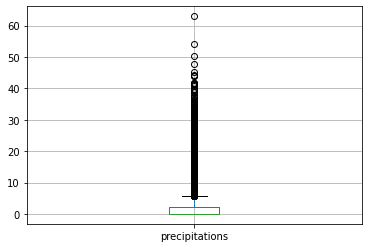

In [15]:
df_final.boxplot('precipitations')

In [16]:
y_periodic_embedded = fit_embedder(embedder_periodic, df_final['precipitations'])

Shape of embedded time series: (702, 8)
Optimal embedding dimension is 8 and time delay is 18


In [17]:
pca = PCA(n_components=3)
y_periodic_embedded_pca = pca.fit_transform(y_periodic_embedded)
plot_point_cloud(y_periodic_embedded_pca)

#### Incrustacion y plot de componentes principales de temperaturas

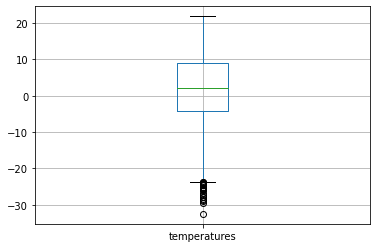

In [18]:
df_final.boxplot('temperatures')

In [19]:
y_periodic_embedded = fit_embedder(embedder_periodic, df_final['temperatures'])
pca = PCA(n_components=3)
y_periodic_embedded_pca = pca.fit_transform(y_periodic_embedded)
plot_point_cloud(y_periodic_embedded_pca)

Shape of embedded time series: (703, 6)
Optimal embedding dimension is 6 and time delay is 20


In [20]:
y_periodic_embedded = fit_embedder(embedder_periodic, df_final['temperatures'])


pca = PCA(n_components=2)
y_periodic_embedded_pca = pca.fit_transform(y_periodic_embedded)
plot_point_cloud(y_periodic_embedded_pca)

Shape of embedded time series: (703, 6)
Optimal embedding dimension is 6 and time delay is 20


In [21]:
from scipy import stats
owo=df_final[(np.abs(stats.zscore(df_final['temperatures'])) < 3)]

### Diagrama de persistencia

In [22]:
y_periodic_embedded = y_periodic_embedded_pca[None, :, :]
from gtda.homology import VietorisRipsPersistence
# 0 - connected components, 1 - loops, 2 - voids
homology_dimensions = [0, 1, 2]
periodic_persistence = VietorisRipsPersistence(
    homology_dimensions=homology_dimensions, n_jobs=6
)
print("Persistence diagram for periodic signal")
periodic_persistence.fit_transform_plot(y_periodic_embedded)



Persistence diagram for periodic signal


array([[[0.        , 0.06319976, 0.        ],
        [0.        , 0.07646697, 0.        ],
        [0.        , 0.07918083, 0.        ],
        ...,
        [1.03857064, 1.04826188, 1.        ],
        [0.93788743, 0.94678551, 1.        ],
        [0.        , 0.        , 2.        ]]])

##DELIRIOS

In [23]:
!pip install keras
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
train = df_final[['temperatures','precipitations']]
test = df_final['flow']

In [25]:
train = np.asarray(train).astype('float32')

In [26]:
test = np.asarray(test).astype('float32')

In [27]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import tensorflow
tensorflow.random.set_seed(1)
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam

In [28]:
#batch_size = 64
#epochs = 20
#num_classes = 10000

In [29]:
model = Sequential()
model.add(Dense(256, input_dim=2, kernel_initializer='normal', activation='relu'))

model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))

model.add(Dense(1, activation='linear'))

In [32]:
model.compile(loss='mse', metrics=['mse','mae'],optimizer='adam')

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               768       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 66,817
Trainable params: 66,817
Non-trainable params: 0
_________________________________________________________________


In [35]:
history = model.fit(train, test, epochs=20, verbose = 1,batch_size=32)
model.evaluate(train, test)

Epoch 1/20
662/662 [==============================] - 2s 3ms/step - loss: 67.2462 - mse: 67.2462 - mae: 4.9914
Epoch 2/20
662/662 [==============================] - 1s 2ms/step - loss: 67.3095 - mse: 67.3095 - mae: 4.9954
Epoch 3/20
662/662 [==============================] - 1s 1ms/step - loss: 67.2258 - mse: 67.2258 - mae: 4.9924
Epoch 4/20
662/662 [==============================] - 1s 1ms/step - loss: 67.3279 - mse: 67.3279 - mae: 4.9909
Epoch 5/20
662/662 [==============================] - 1s 2ms/step - loss: 67.3348 - mse: 67.3348 - mae: 4.9978
Epoch 6/20
662/662 [==============================] - 1s 2ms/step - loss: 67.3593 - mse: 67.3593 - mae: 4.9920
Epoch 7/20
662/662 [==============================] - 1s 1ms/step - loss: 67.3394 - mse: 67.3394 - mae: 4.9892
Epoch 8/20
662/662 [==============================] - 1s 1ms/step - loss: 67.1821 - mse: 67.1821 - mae: 4.9971
Epoch 9/20
662/662 [==============================] - 1s 2ms/step - loss: 67.5408 - mse: 67.5408 - mae: 4.9990
E

[66.99784088134766, 66.99784088134766, 5.04131555557251]

In [37]:
model = Sequential()
model.add(Dense(128, input_dim=2, kernel_initializer='normal', activation='relu'))

model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))

model.add(Dense(1, activation='linear'))

model.compile(loss='mse', metrics=['mse','mae'],optimizer='adam')
model.summary()

In [40]:
history = model.fit(train, test, epochs=20, verbose = 1,batch_size=32)
model.evaluate(train, test)

Epoch 1/20
662/662 [==============================] - 2s 3ms/step - loss: 75.1048 - mse: 75.1048 - mae: 5.1972
Epoch 2/20
662/662 [==============================] - 1s 2ms/step - loss: 69.6402 - mse: 69.6402 - mae: 5.0512
Epoch 3/20
662/662 [==============================] - 1s 2ms/step - loss: 69.1075 - mse: 69.1075 - mae: 5.0450
Epoch 4/20
662/662 [==============================] - 1s 2ms/step - loss: 68.8273 - mse: 68.8273 - mae: 5.0296
Epoch 5/20
662/662 [==============================] - 1s 2ms/step - loss: 68.8025 - mse: 68.8025 - mae: 5.0452
Epoch 6/20
662/662 [==============================] - 1s 2ms/step - loss: 68.7145 - mse: 68.7145 - mae: 5.0311
Epoch 7/20
662/662 [==============================] - 1s 2ms/step - loss: 68.5321 - mse: 68.5321 - mae: 5.0278
Epoch 8/20
662/662 [==============================] - 1s 2ms/step - loss: 68.2025 - mse: 68.2025 - mae: 5.0190
Epoch 9/20
662/662 [==============================] - 1s 2ms/step - loss: 68.2550 - mse: 68.2550 - mae: 5.0200
E

[67.72581481933594, 67.72581481933594, 5.060823440551758]

In [51]:
model = Sequential()
model.add(Dense(128, input_dim=2, kernel_initializer='normal', activation='gelu'))

model.add(Dense(256, activation='gelu'))
model.add(Dense(256, activation='gelu'))
model.add(Dense(256, activation='gelu'))

model.add(Dense(1, activation='linear'))

model.compile(loss='mse', metrics=['mse','mae'],optimizer='adam')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                                 
Total params: 165,249
Trainable params: 165,249
Non-trainable params: 0
_________________________________________________________________


In [52]:
history = model.fit(train, test, epochs=20, verbose = 1,batch_size=64)
model.evaluate(train, test)

Epoch 1/20
662/662 [==============================] - 3s 3ms/step - loss: 70.8664 - mse: 70.8664 - mae: 5.1078
Epoch 2/20
662/662 [==============================] - 2s 3ms/step - loss: 69.0149 - mse: 69.0149 - mae: 5.0489
Epoch 3/20
662/662 [==============================] - 2s 3ms/step - loss: 68.7349 - mse: 68.7349 - mae: 5.0455
Epoch 4/20
662/662 [==============================] - 2s 3ms/step - loss: 68.7248 - mse: 68.7248 - mae: 5.0313
Epoch 5/20
662/662 [==============================] - 2s 3ms/step - loss: 68.4794 - mse: 68.4794 - mae: 5.0377
Epoch 6/20
662/662 [==============================] - 2s 3ms/step - loss: 68.4774 - mse: 68.4774 - mae: 5.0261
Epoch 7/20
662/662 [==============================] - 2s 3ms/step - loss: 68.4971 - mse: 68.4971 - mae: 5.0261
Epoch 8/20
662/662 [==============================] - 2s 3ms/step - loss: 68.1702 - mse: 68.1702 - mae: 5.0210
Epoch 9/20
662/662 [==============================] - 2s 3ms/step - loss: 68.0590 - mse: 68.0590 - mae: 5.0166
E

[67.55046844482422, 67.55046844482422, 5.085148334503174]

In [54]:
history = model.fit(train, test, epochs=50, verbose = 1,batch_size=32)
model.evaluate(train, test)

Epoch 1/50
662/662 [==============================] - 2s 4ms/step - loss: 67.6675 - mse: 67.6675 - mae: 5.0093
Epoch 2/50
662/662 [==============================] - 2s 3ms/step - loss: 67.6265 - mse: 67.6265 - mae: 5.0025
Epoch 3/50
662/662 [==============================] - 2s 3ms/step - loss: 67.5220 - mse: 67.5220 - mae: 5.0031
Epoch 4/50
662/662 [==============================] - 2s 3ms/step - loss: 67.6365 - mse: 67.6365 - mae: 4.9990
Epoch 5/50
662/662 [==============================] - 2s 3ms/step - loss: 67.5056 - mse: 67.5056 - mae: 5.0055
Epoch 6/50
662/662 [==============================] - 2s 3ms/step - loss: 67.6015 - mse: 67.6015 - mae: 4.9967
Epoch 7/50
662/662 [==============================] - 2s 3ms/step - loss: 67.7640 - mse: 67.7640 - mae: 5.0025
Epoch 8/50
662/662 [==============================] - 2s 3ms/step - loss: 67.5629 - mse: 67.5629 - mae: 5.0034
Epoch 9/50
662/662 [==============================] - 2s 3ms/step - loss: 67.5164 - mse: 67.5164 - mae: 5.0030
E

[67.09205627441406, 67.09205627441406, 5.104537010192871]

In [55]:
model = Sequential()
model.add(Dense(64, input_dim=2, kernel_initializer='normal', activation='gelu'))

model.add(Dense(32, activation='gelu'))
model.add(Dense(32, activation='gelu'))
model.add(Dense(32, activation='gelu'))

model.add(Dense(1, activation='linear'))

model.compile(loss='mse', metrics=['mse','mae'],optimizer='adam')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                192       
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 32)                1056      
                                                                 
 dense_8 (Dense)             (None, 32)                1056      
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,417
Trainable params: 4,417
Non-trainable params: 0
_________________________________________________________________


In [56]:
history = model.fit(train, test, epochs=20, verbose = 1,batch_size=32)
model.evaluate(train, test)

Epoch 1/20
662/662 [==============================] - 2s 2ms/step - loss: 74.5161 - mse: 74.5161 - mae: 5.1689
Epoch 2/20
662/662 [==============================] - 1s 1ms/step - loss: 68.5511 - mse: 68.5511 - mae: 5.0268
Epoch 3/20
662/662 [==============================] - 1s 1ms/step - loss: 68.2480 - mse: 68.2480 - mae: 5.0260
Epoch 4/20
662/662 [==============================] - 1s 1ms/step - loss: 68.3415 - mse: 68.3415 - mae: 5.0156
Epoch 5/20
662/662 [==============================] - 1s 1ms/step - loss: 68.2483 - mse: 68.2483 - mae: 5.0331
Epoch 6/20
662/662 [==============================] - 1s 1ms/step - loss: 68.2097 - mse: 68.2097 - mae: 5.0179
Epoch 7/20
662/662 [==============================] - 1s 1ms/step - loss: 68.2232 - mse: 68.2232 - mae: 5.0180
Epoch 8/20
662/662 [==============================] - 1s 1ms/step - loss: 68.0403 - mse: 68.0403 - mae: 5.0177
Epoch 9/20
662/662 [==============================] - 1s 1ms/step - loss: 67.9451 - mse: 67.9451 - mae: 5.0141
E

[67.51079559326172, 67.51079559326172, 5.089613437652588]

In [57]:
model = Sequential()
model.add(Dense(8, input_dim=2, kernel_initializer='normal', activation='gelu'))

model.add(Dense(32, activation='gelu'))
model.add(Dense(64, activation='gelu'))
model.add(Dense(32, activation='gelu'))

model.add(Dense(1, activation='linear'))

model.compile(loss='mse', metrics=['mse','mae'],optimizer='adam')
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 8)                 24        
                                                                 
 dense_11 (Dense)            (None, 32)                288       
                                                                 
 dense_12 (Dense)            (None, 64)                2112      
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 4,537
Trainable params: 4,537
Non-trainable params: 0
_________________________________________________________________


In [58]:
history = model.fit(train, test, epochs=20, verbose = 1,batch_size=32)
model.evaluate(train, test)

Epoch 1/20
662/662 [==============================] - 2s 2ms/step - loss: 75.4735 - mse: 75.4735 - mae: 5.2264
Epoch 2/20
662/662 [==============================] - 1s 1ms/step - loss: 68.5413 - mse: 68.5413 - mae: 5.0313
Epoch 3/20
662/662 [==============================] - 1s 1ms/step - loss: 68.2757 - mse: 68.2757 - mae: 5.0326
Epoch 4/20
662/662 [==============================] - 1s 1ms/step - loss: 68.3773 - mse: 68.3773 - mae: 5.0193
Epoch 5/20
662/662 [==============================] - 1s 1ms/step - loss: 68.2477 - mse: 68.2477 - mae: 5.0345
Epoch 6/20
662/662 [==============================] - 1s 1ms/step - loss: 68.1956 - mse: 68.1956 - mae: 5.0203
Epoch 7/20
662/662 [==============================] - 1s 1ms/step - loss: 68.2112 - mse: 68.2112 - mae: 5.0195
Epoch 8/20
662/662 [==============================] - 1s 1ms/step - loss: 68.0718 - mse: 68.0718 - mae: 5.0194
Epoch 9/20
662/662 [==============================] - 1s 1ms/step - loss: 67.9570 - mse: 67.9570 - mae: 5.0130
E

[67.66902923583984, 67.66902923583984, 5.072835922241211]

In [59]:
model = Sequential()
model.add(Dense(512, input_dim=2, kernel_initializer='normal', activation='gelu'))

model.add(Dense(256, activation='gelu'))
model.add(Dense(128, activation='gelu'))
model.add(Dense(64, activation='gelu'))

model.add(Dense(1, activation='linear'))

model.compile(loss='mse', metrics=['mse','mae'],optimizer='adam')
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 512)               1536      
                                                                 
 dense_16 (Dense)            (None, 256)               131328    
                                                                 
 dense_17 (Dense)            (None, 128)               32896     
                                                                 
 dense_18 (Dense)            (None, 64)                8256      
                                                                 
 dense_19 (Dense)            (None, 1)                 65        
                                                                 
Total params: 174,081
Trainable params: 174,081
Non-trainable params: 0
_________________________________________________________________


In [60]:
history = model.fit(train, test, epochs=20, verbose = 1,batch_size=32)
model.evaluate(train, test)

Epoch 1/20
662/662 [==============================] - 3s 3ms/step - loss: 71.0367 - mse: 71.0367 - mae: 5.0892
Epoch 2/20
662/662 [==============================] - 2s 3ms/step - loss: 69.0296 - mse: 69.0296 - mae: 5.0445
Epoch 3/20
662/662 [==============================] - 2s 3ms/step - loss: 68.6373 - mse: 68.6373 - mae: 5.0341
Epoch 4/20
662/662 [==============================] - 2s 3ms/step - loss: 68.6293 - mse: 68.6293 - mae: 5.0253
Epoch 5/20
662/662 [==============================] - 2s 3ms/step - loss: 68.4276 - mse: 68.4276 - mae: 5.0312
Epoch 6/20
662/662 [==============================] - 2s 3ms/step - loss: 68.3645 - mse: 68.3645 - mae: 5.0203
Epoch 7/20
662/662 [==============================] - 2s 3ms/step - loss: 68.3858 - mse: 68.3858 - mae: 5.0229
Epoch 8/20
662/662 [==============================] - 2s 3ms/step - loss: 68.1092 - mse: 68.1092 - mae: 5.0182
Epoch 9/20
662/662 [==============================] - 2s 3ms/step - loss: 68.0674 - mse: 68.0674 - mae: 5.0138
E

[67.43392944335938, 67.43392944335938, 5.074832916259766]